<a href="https://colab.research.google.com/github/iru99/pytorch_Tutorial/blob/main/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Network**


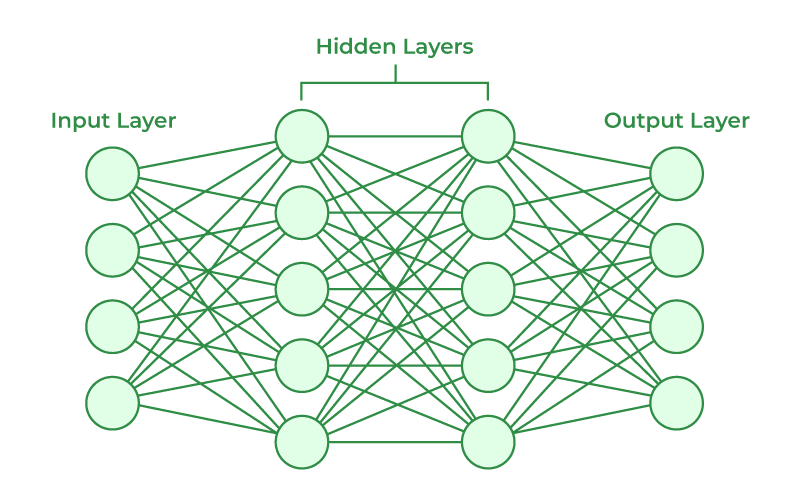

Neural networks (or Artificial Neural Networks - ANNs) are computational models in AI, inspired by the human brain, using interconnected nodes (neurons) in layers to learn complex patterns from data for tasks like image recognition and NLP, adjusting connection strengths (weights) during training to improve accuracy without explicit programming. They form the backbone of deep learning, enabling computers to process data, recognize patterns, and make predictions in a layered, brain-like structure, powering many modern AI applications.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torch.autograd import forward_ad
# create a model class that inherits nn.module

class Model(nn.Module):
  # Input layer (4 features of the flower)
  #Hidden layer1 (num of neurons)
  # H2 --> Output (3 classes flowers)
  def __init__(self, in_features=4, h1 = 8, h2=9, out_features=3):
    super().__init__() # Instantiate our nn.module
    self.fc1 = nn.Linear(in_features, h1) # We need to do this for each layer we have
    # Moving features from in_features to h1
    self.fc2 = nn.Linear(h1, h2)
    # Moving features from h1 to h2
    self.out = nn.Linear(h2, out_features)
    # Moving features from h2 to output

  def forward(self, X):
    X = F.relu(self.fc1(X))
    # relu --> do something if the out put less than 0, lets call it 0
    # otherwise use the output (rectify lenear unit)
    X = F.relu(self.fc2(X))
    X = self.out(X)
    return X

Before turn it on we need to create a manual seed and we do that becaues
Neural Network involve randomization every time.

In [4]:
torch.manual_seed(41)
# Create an instance of model

model = Model()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [6]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)

In [7]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Change last column into integers
my_df['species'] = my_df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})
my_df.head()

/tmp/ipython-input-3590038762.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
# Train, Test and Split

X = my_df.drop('species', axis =1)
y = my_df['species']

In [10]:
# Convert these to numpy arrays

X = X.values
y = y.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Train test and split --> test size is 20% and train size is 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [13]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# set the criterion of the model to measure the error
# how far off the prediction are from the data

criterian = nn.CrossEntropyLoss()
# Choose Adam optimizer
#lr = learnind rate is error doesn't go down after brunch of iterations, lower learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
# Train our model
# Epochs ? --> one run thru all the training data in our network

epoch = 100
losses = []

for i in range(epoch):
  # Go foward and get the prediction
  y_pred = model.forward(X_train) # Predicted results
  # Calculate the loss/error, gonna be high at first
  loss = criterian(y_pred, y_train)
  losses.append(loss.detach().numpy())

  # Print every 10 epoch

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # do some back propergation
  # Take the error rate of forward propagation and feed it back
  # through the network to fine tune weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'epoch')

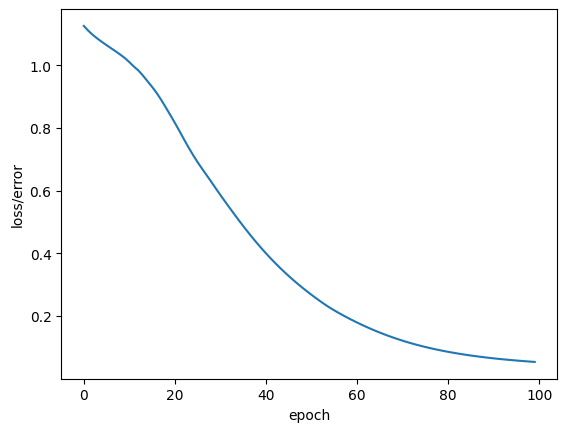

In [16]:
plt.plot(range(epoch), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [20]:
# Evalate model on test data set (validate model on test set)

with torch.no_grad(): # Turn off bach propergation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be prediction
  loss = criterian(y_eval, y_test) # Find the loss or error

In [21]:
loss

tensor(0.1315)

In [31]:
# 0.065 and 0.135 has major defference. We wanna see these two numbers almost equal

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      X = 'Setosa'
    elif y_test[i] == 1:
      X = 'Versicolor'
    else:
      X = 'Virginica'

    # will tell us what type of flower class our network thinks it is
    print(f'{i+1}. {str(y_val)} \t\t {X} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'we got {correct} correct!')

1. tensor([-5.8760,  4.4628,  6.5124]) 		 Virginica 	 2
2. tensor([-7.5436,  4.1670,  9.7255]) 		 Virginica 	 2
3. tensor([-8.4504,  5.1271, 10.1987]) 		 Virginica 	 2
4. tensor([-4.3398,  5.6267,  2.5608]) 		 Versicolor 	 1
5. tensor([-7.1825,  4.8754,  8.2992]) 		 Virginica 	 2
6. tensor([-3.3974,  5.3463,  1.2803]) 		 Versicolor 	 1
7. tensor([-5.9231,  4.9822,  5.9997]) 		 Virginica 	 2
8. tensor([-4.2881,  5.7003,  2.3889]) 		 Versicolor 	 1
9. tensor([-6.5356,  4.9257,  7.1260]) 		 Virginica 	 2
10. tensor([-8.0509,  4.4129, 10.3286]) 		 Virginica 	 2
11. tensor([-5.6762,  4.9500,  5.6215]) 		 Virginica 	 2
12. tensor([ 4.5662, -2.2476, -2.8911]) 		 Setosa 	 0
13. tensor([ 4.2571, -1.9967, -2.7330]) 		 Setosa 	 0
14. tensor([-2.1108,  4.0515,  0.5799]) 		 Versicolor 	 1
15. tensor([ 3.4575, -1.2098, -2.3514]) 		 Setosa 	 0
16. tensor([-5.4724,  5.1165,  5.0934]) 		 Virginica 	 1
17. tensor([ 4.0557, -1.7949, -2.6492]) 		 Setosa 	 0
18. tensor([-5.8075,  4.6053,  6.2458]) 		 Versi

**Expected:**

Here we got 28 correct which is what we would sort of expect. there are 30, some of these wrong because 0.065 and 0.135 not close to each others

Now we wre going to add new data and then make predictions.
Imagine we got a new flower and we want to know what type of flower is this

Let's see how we can put this into our model

In [32]:
new_iris1 = torch.tensor([4.7, 3.2, 1.3, 0.2])

with torch.no_grad():
  print(model(new_iris1))

tensor([ 4.5365, -2.2383, -2.8684])


In [33]:
new_iris2 = torch.tensor([5.0,	3.6,	1.4,	0.2	])

with torch.no_grad():
  print(model(new_iris2))


tensor([ 4.8459, -2.5070, -3.0179])


**Save our NN model**

In [34]:
torch.save(model.state_dict(), 'iris_model.pt')

In [37]:
# Load the saved model

new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [38]:
# Make sure it loaded correctly

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [39]:
new_iris3 = torch.tensor([5.0,	3.6,	1.4,	0.2	])

with torch.no_grad():
  print(new_model(new_iris3))


tensor([ 4.8459, -2.5070, -3.0179])
